**Business Objective : An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. The objective is to build a model to identify the hot/potential leads and achieve lead conversion rate to 80%.**

## Data Sourcing

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

## Data Reading

In [6]:
#Importing the dataset to a csv file.
lead = pd.read_csv('Leads.csv')

In [7]:
#Displaying the content of the data
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#Inspecting the shape
print(lead.shape)

(9240, 37)


In [9]:
#Inspecting the columns
print(lead.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [10]:
#inspecting the datatypes of variables
print(lead.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [11]:
#Listing down all the columns along with name ,no of non null values,datatype,memory usage
print(lead.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
#Describing Mean,std,min,25%,50%,75%,max of the dataset
print(lead.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

## Data Cleaning

### Calculating the missing value percentage in each column

In [13]:
#Percentage of missing values in each column.
nullfind = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullfind)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Data Cleaning - Removing (Score variable) all unnecessary information from the dataframe.**

**Reason to remove score variables :** Score variable are those variables in the dataframe where the sales team has already contacted the lead, since the lead has already been contacted it does not add more value to our analysis, So we drop these variables.

**Dropping the below score variable first**

- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

In [14]:
#Dropping all score variables in the dataframe.
lead.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [15]:
#When we inspect the column we can see that above score variables are removed.
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
#Checking columns having null value greater than or equal to 37%
print(nullseries[nullseries >= 37])

Series([], dtype: float64)


In [18]:
#Dropping all columns having a missing value percentage greater than 37%.
lead = lead.drop(lead.loc[:,list((100*(lead.isnull().sum()/len(lead.index))>=37))].columns, 1)

In [19]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Data Cleaning - Checking for unique category - Combining categories  having low values to make a meaningful category

In [20]:
#Checking uniqueness in all categorical variables
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [21]:
#Checking uniqueness in all categorical variables
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [22]:
#Checking uniqueness in all categorical variables
lead['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [23]:
#Checking uniqueness in all categorical variables
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [24]:
#Checking uniqueness in all categorical variables
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [25]:
#Checking uniqueness in all categorical variables
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [26]:
#Checking uniqueness in all categorical variables
lead['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [27]:
#Checking uniqueness in all categorical variables
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [28]:
#Checking uniqueness in all categorical variables
lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [29]:
#Checking uniqueness in all categorical variables
lead['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [30]:
#Checking uniqueness in all categorical variables
lead['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [31]:
#Checking uniqueness in all categorical variables
lead['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [32]:
#Checking uniqueness in all categorical variables
lead['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [33]:
#Checking uniqueness in all categorical variables
lead['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [34]:
#Checking uniqueness in all categorical variables
lead['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [35]:
#Checking uniqueness in all categorical variables
lead['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [36]:
#Checking uniqueness in all categorical variables
lead['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [37]:
#Checking uniqueness in all categorical variable
lead['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [38]:
#Checking uniqueness in all categorical variable
lead['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [39]:
#Checking uniqueness in all categorical variable
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

**Dropping highky skewed columns is important because : there is a high data imbalance amongst the columns and it does not add more value to model building.**

**Following Columns To Be Drop:**

- Do Not Email
- Do Not Call
- Country
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article  
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [40]:
#Dropping columns with high data imbalance
lead.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course',
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [41]:
#Inspecting to check if the columns have been deleted carefully.
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [43]:
print("Total number of columns :", len(lead.columns))

Total number of columns : 15


### Data Cleaning - Combining columns having low percentages into one single column.

In [44]:
#Inspecting the column again
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [45]:
#Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
lead['Lead Origin'] = lead['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [46]:
#Checking if the category has been correctly replaced.
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

In [47]:
#Inspecting Lead Source column.
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [48]:
#Combining categories
lead['Lead Source'] = lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call',
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [49]:
#Inspecting Lead Source column.
lead['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [50]:
#Inspecting 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [51]:
#Combining together to form 'Others' Categories.
lead['Last Activity']=lead['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others')

In [52]:
#Inspecting 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

**Specialization**

In [53]:
#Inspecting the specialization column
lead['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [54]:
#Combining categories < 2%  into 'Others'
lead['Specialization']=lead['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others')

In [55]:
#Inspecting the column again to recheck the same.
lead['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Others                               0.063573
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Name: Specialization, dtype: float64

In [56]:
#We also handle the missing values for this Specialisation column, we add another column known as "Not Specified" for all missing values.
lead.Specialization.fillna('Not Specified', inplace=True)

In [57]:
#Inspecting the column again to recheck the same.
lead['Specialization'].value_counts(normalize=True)

Select                               0.210173
Not Specified                        0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Others                               0.053680
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Name: Specialization, dtype: float64

**Current Occupation**

In [58]:
#Inspecting value counts for Current Occupation
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [59]:
#Combining categories
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [60]:
#Rechecking to find if the categories are correctly combined.
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

### Imputing columns with low null value percentages

- **Generally categorical columns are imputed with 'mode'.**
- **And, Numerical columns are imputed with mean or median.**

In [61]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
How did you hear about X Education        23.89
What is your current occupation           29.11
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


#### **Imputing categorical columns**

In [62]:
#Imputing categorical columns with Mode
lead['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [63]:
#Imputing missing values in 'Lead Source' with mode.
lead['Lead Source'].fillna('Google',inplace=True)

In [64]:
#Imputing categorical columns with Mode
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [65]:
#Imputing missing values in 'Last Activity' with mode.
lead['Last Activity'].fillna('Email Opened',inplace=True)

In [66]:
#Imputing categorical columns with Mode
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [67]:
#Replacing categorical columns with Unemployed in Current Occupation
lead['What is your current occupation'].fillna('Unemployed', inplace = True)

#### **Imputing numerical columns**

In [68]:
#Since TotalVisits is a numerical column, we first inspect the data.
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [69]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3.
lead['TotalVisits'].fillna(lead['TotalVisits'].median(),inplace=True)

In [70]:
#Checking for distribution
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [71]:
#Page Per Views is also a numerical column, hence we check the distribution first.
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [72]:
#Imputing missing values with mean/median which is 2.
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace=True)

In [73]:
#Page Per Views is also a numerical column, hence we check the distribution first.
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Cross-Checking for missing values again.

In [74]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
How did you hear about X Education        23.89
What is your current occupation            0.00
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [75]:
#Row-wise null count
print(lead.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


**Duplicates check**

In [76]:
#Checking for any duplicates in the data.
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity


## EDA (Exploratory Data Analysis)

In [77]:
#Displaying the data types on different columns
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
How did you hear about X Education         object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

**EDA - Numerical Values**

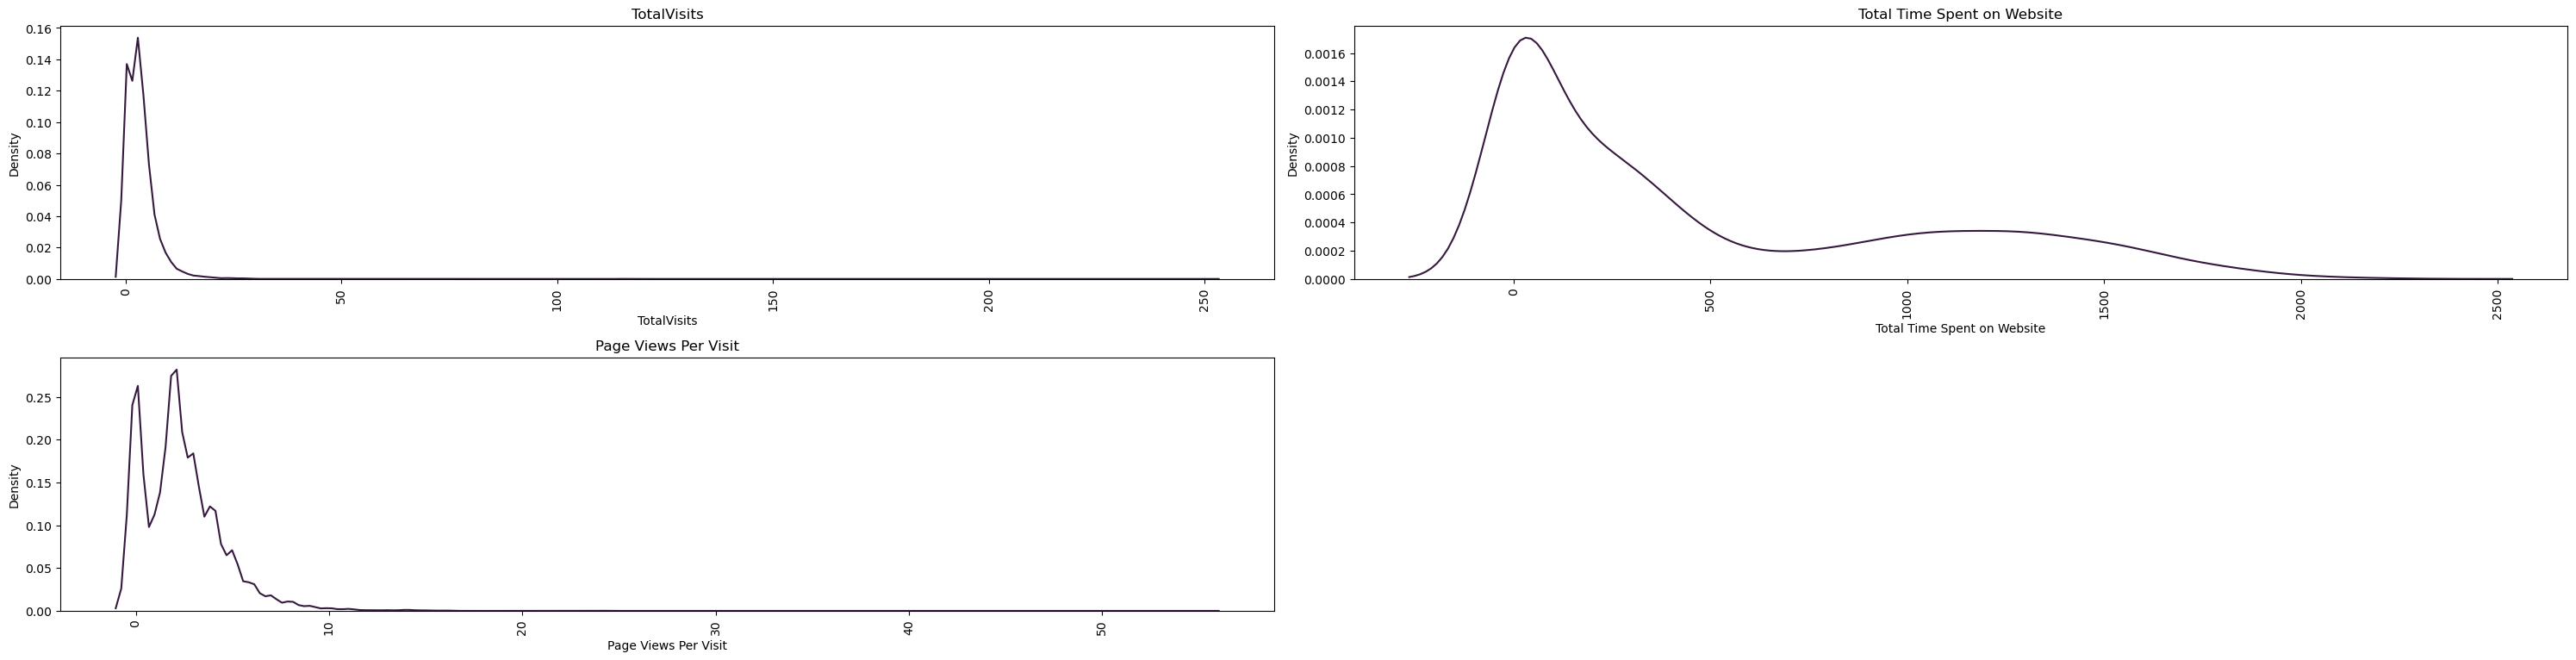

In [78]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("rocket")
plt.figure(figsize = (30, 15))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(lead[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Observation :**

**Uni-variate Analysis - Numerical values:**

- The max probability for TotalVisits is found to be around 15-20. It increases initially but decreases further.
- The max probability for PageViewsPerVisit is found to be around to be 3-5
- The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

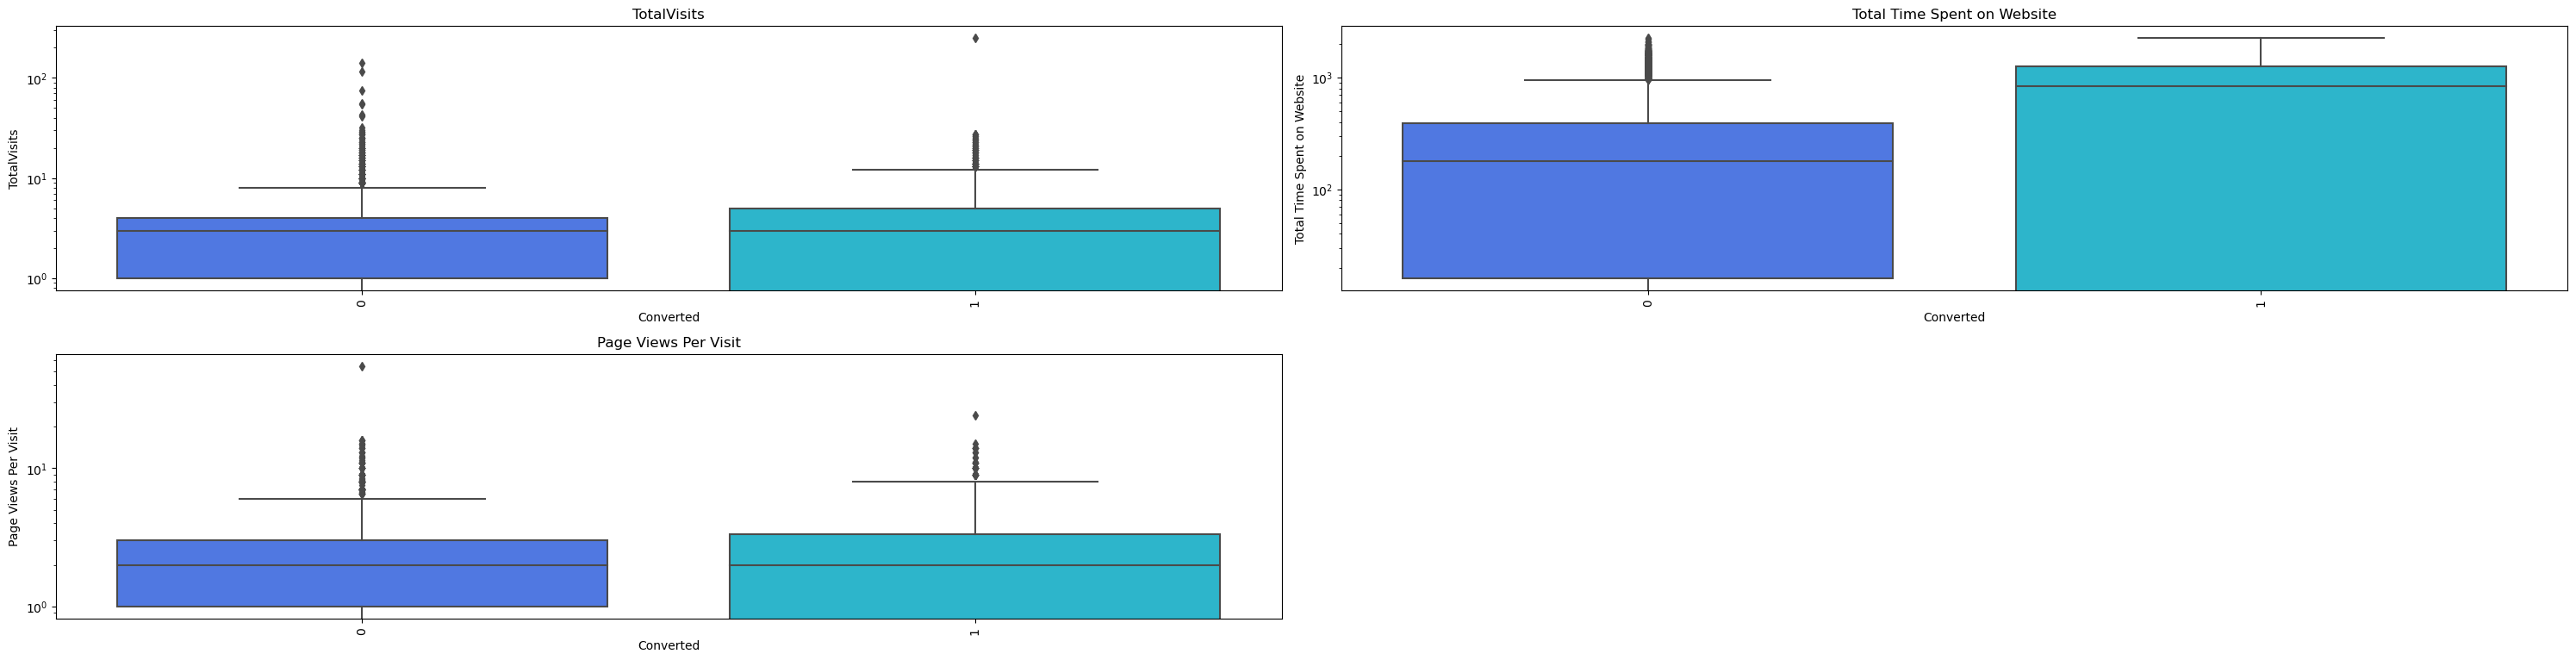

In [79]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("rainbow")
plt.figure(figsize = (30, 15))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Converted', y=col[1], data = lead)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Observation :**

**Bi-variate Analysis - Numerical values:**

- The mean is found to be higher in case of Converted people rather than non-converted people.

- The average page views for both converted and non converted is found to be the same.

- The average total visits for both converted and non converted people is found to be the same.

**EDA - Categorical values**

In [80]:
#Copying from the lead dataframe for easier eda
leadCopy = lead.copy()

In [81]:
#Displaying the dataframe
leadCopy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Mumbai,No,Modified


In [82]:
leadCopy['Category'] = leadCopy.Converted.astype('category')

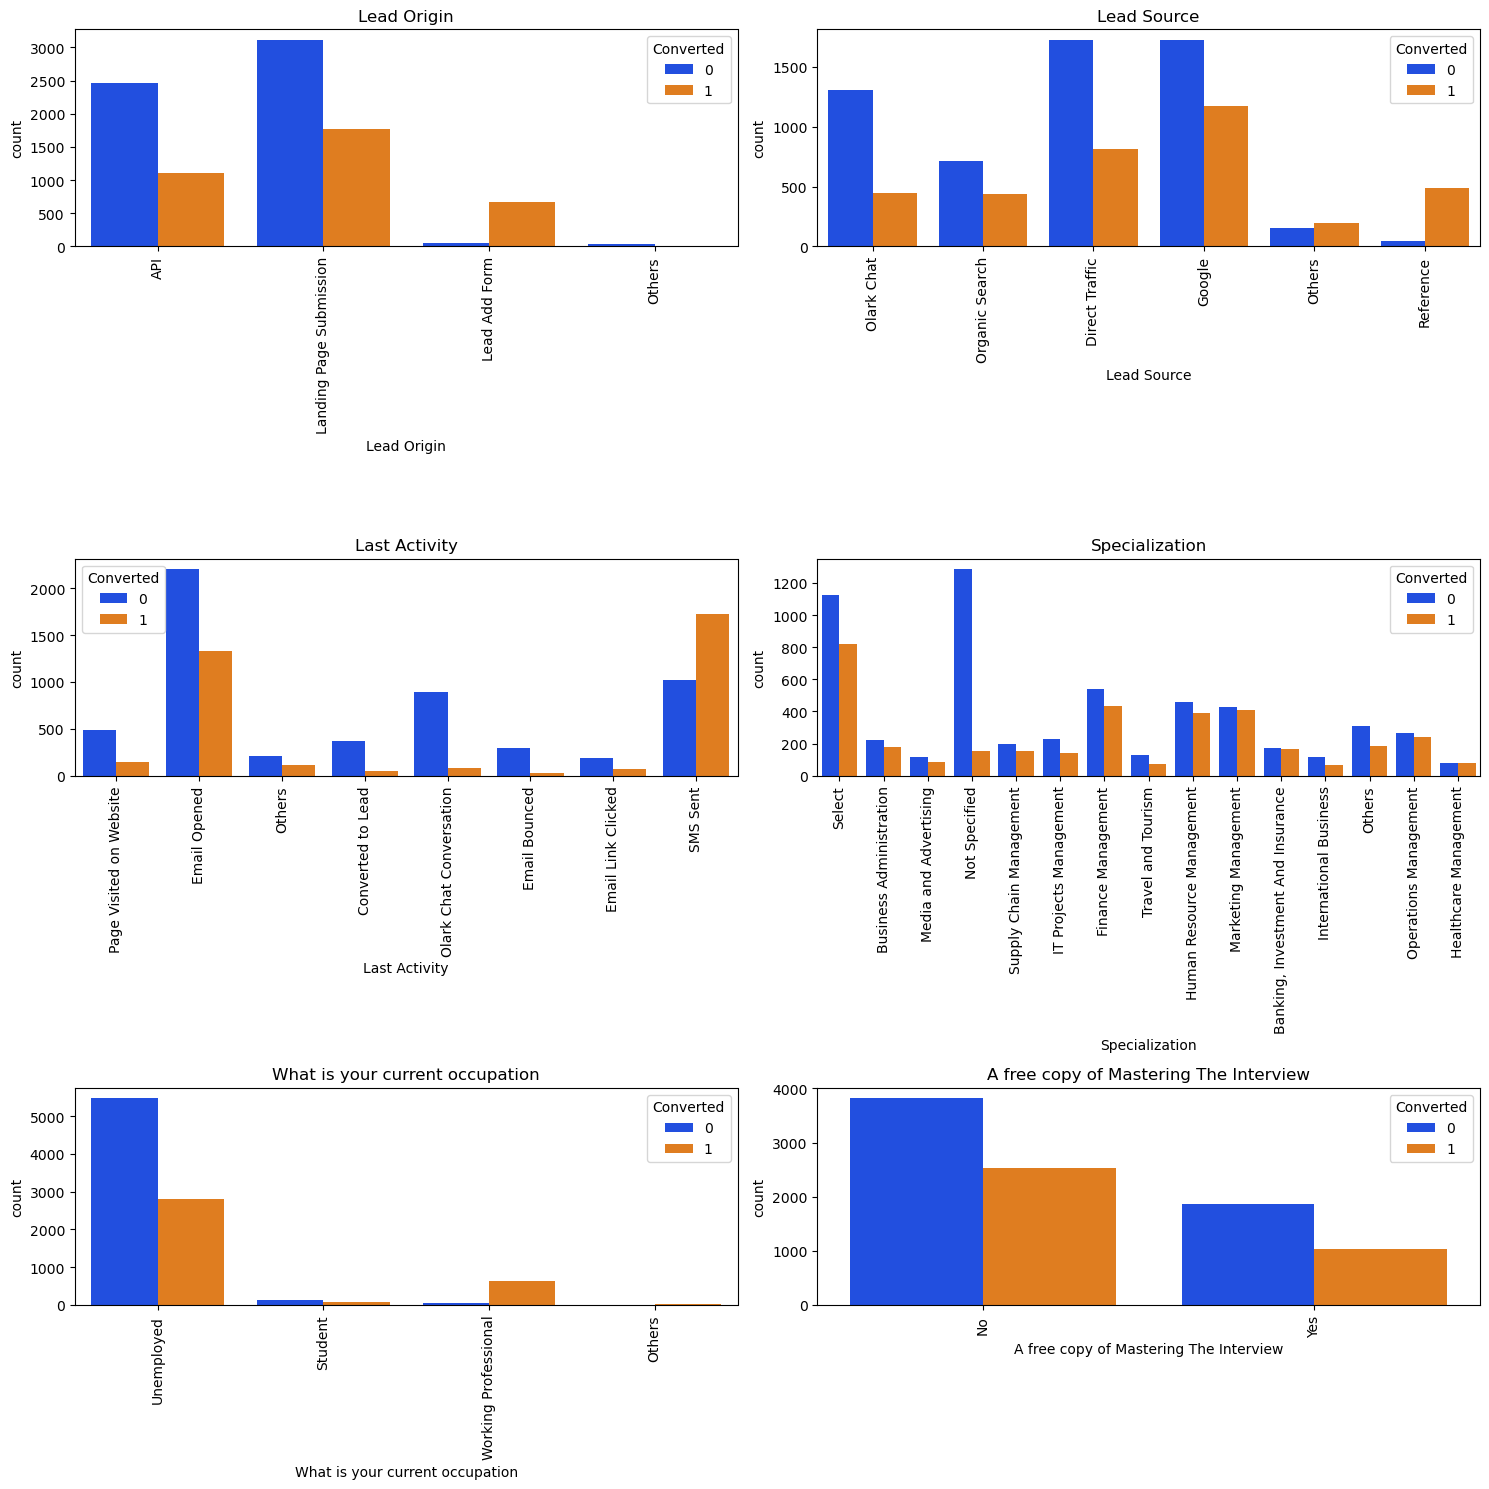

In [83]:
Required_columns= ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = leadCopy, x=col[1], hue='Converted')
    plt.xticks(rotation = 90)
    plt.tight_layout()

**Univariate analysis for Categorical data**

- The percentage of Converted people is found to be greater for Landing Page Submission. We can also see that if Lead source is Add Form, the ratio of lead conversion is very high(almost not converted is very less).

- Google is found to be the important source for Lead Conversion

- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher.

- We cannot infer much about conversion rate from specialisation as people who do not select any specialisation can also be converted to a lead.But the ratio of non converted leads is higher than converted ones if they didn't choose specialisation.

- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals.

- People usually do not subscribe for a free copy of mastering the interview.

## Outliers Handling

In [84]:
#Inspectig the data types of all columns
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
How did you hear about X Education         object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

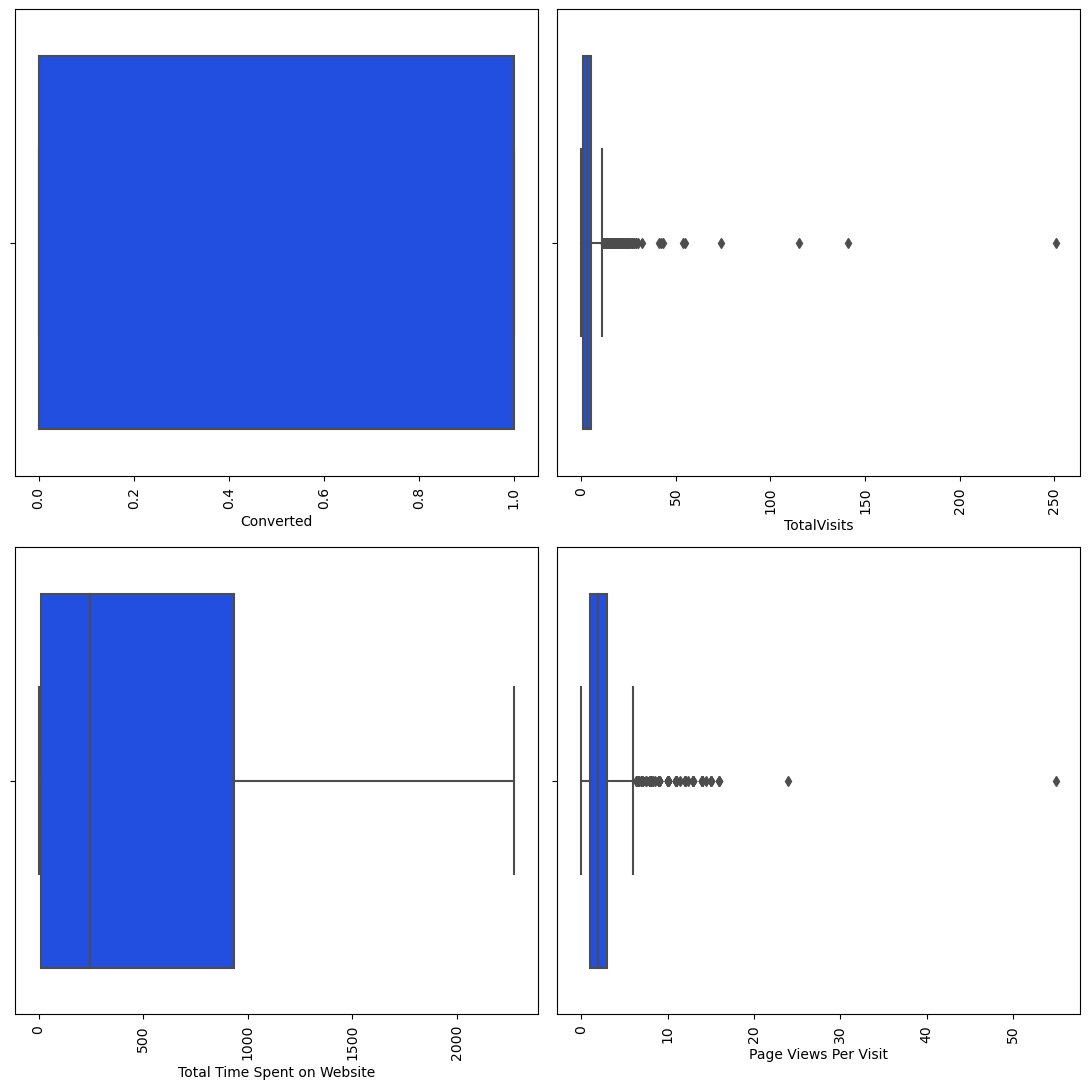

In [85]:
#There are 4 numerical columns - Converted , TotalVisits, Total Time Spent on Website, 'Page Views Per Visit
#Plotting them to check for outliers.

numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [86]:
#TotalVisits and Page Views Per Visit have outliers
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [87]:
#diff1 will provide the difference between outliers and 99th percentile.
#If the value is too big, we can conclude that there are outliers.
diff1 = lead.TotalVisits.max() - lead.TotalVisits.quantile(0.99)
diff1

234.0

In [88]:
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [89]:
#diff2 will provide the difference between outliers and 99th percentile.
#If the value is too big, we can conclude that there are outliers.
diff2 = lead['Page Views Per Visit'].max() - lead['Page Views Per Visit'].quantile(0.99)
diff2

46.0

In [90]:
req_cols=['TotalVisits','Page Views Per Visit']
for col in req_cols:
    percentiles = lead[col].quantile(0.99)  ## capping higher range outliers
    lead[col][lead[col] >= percentiles] = percentiles

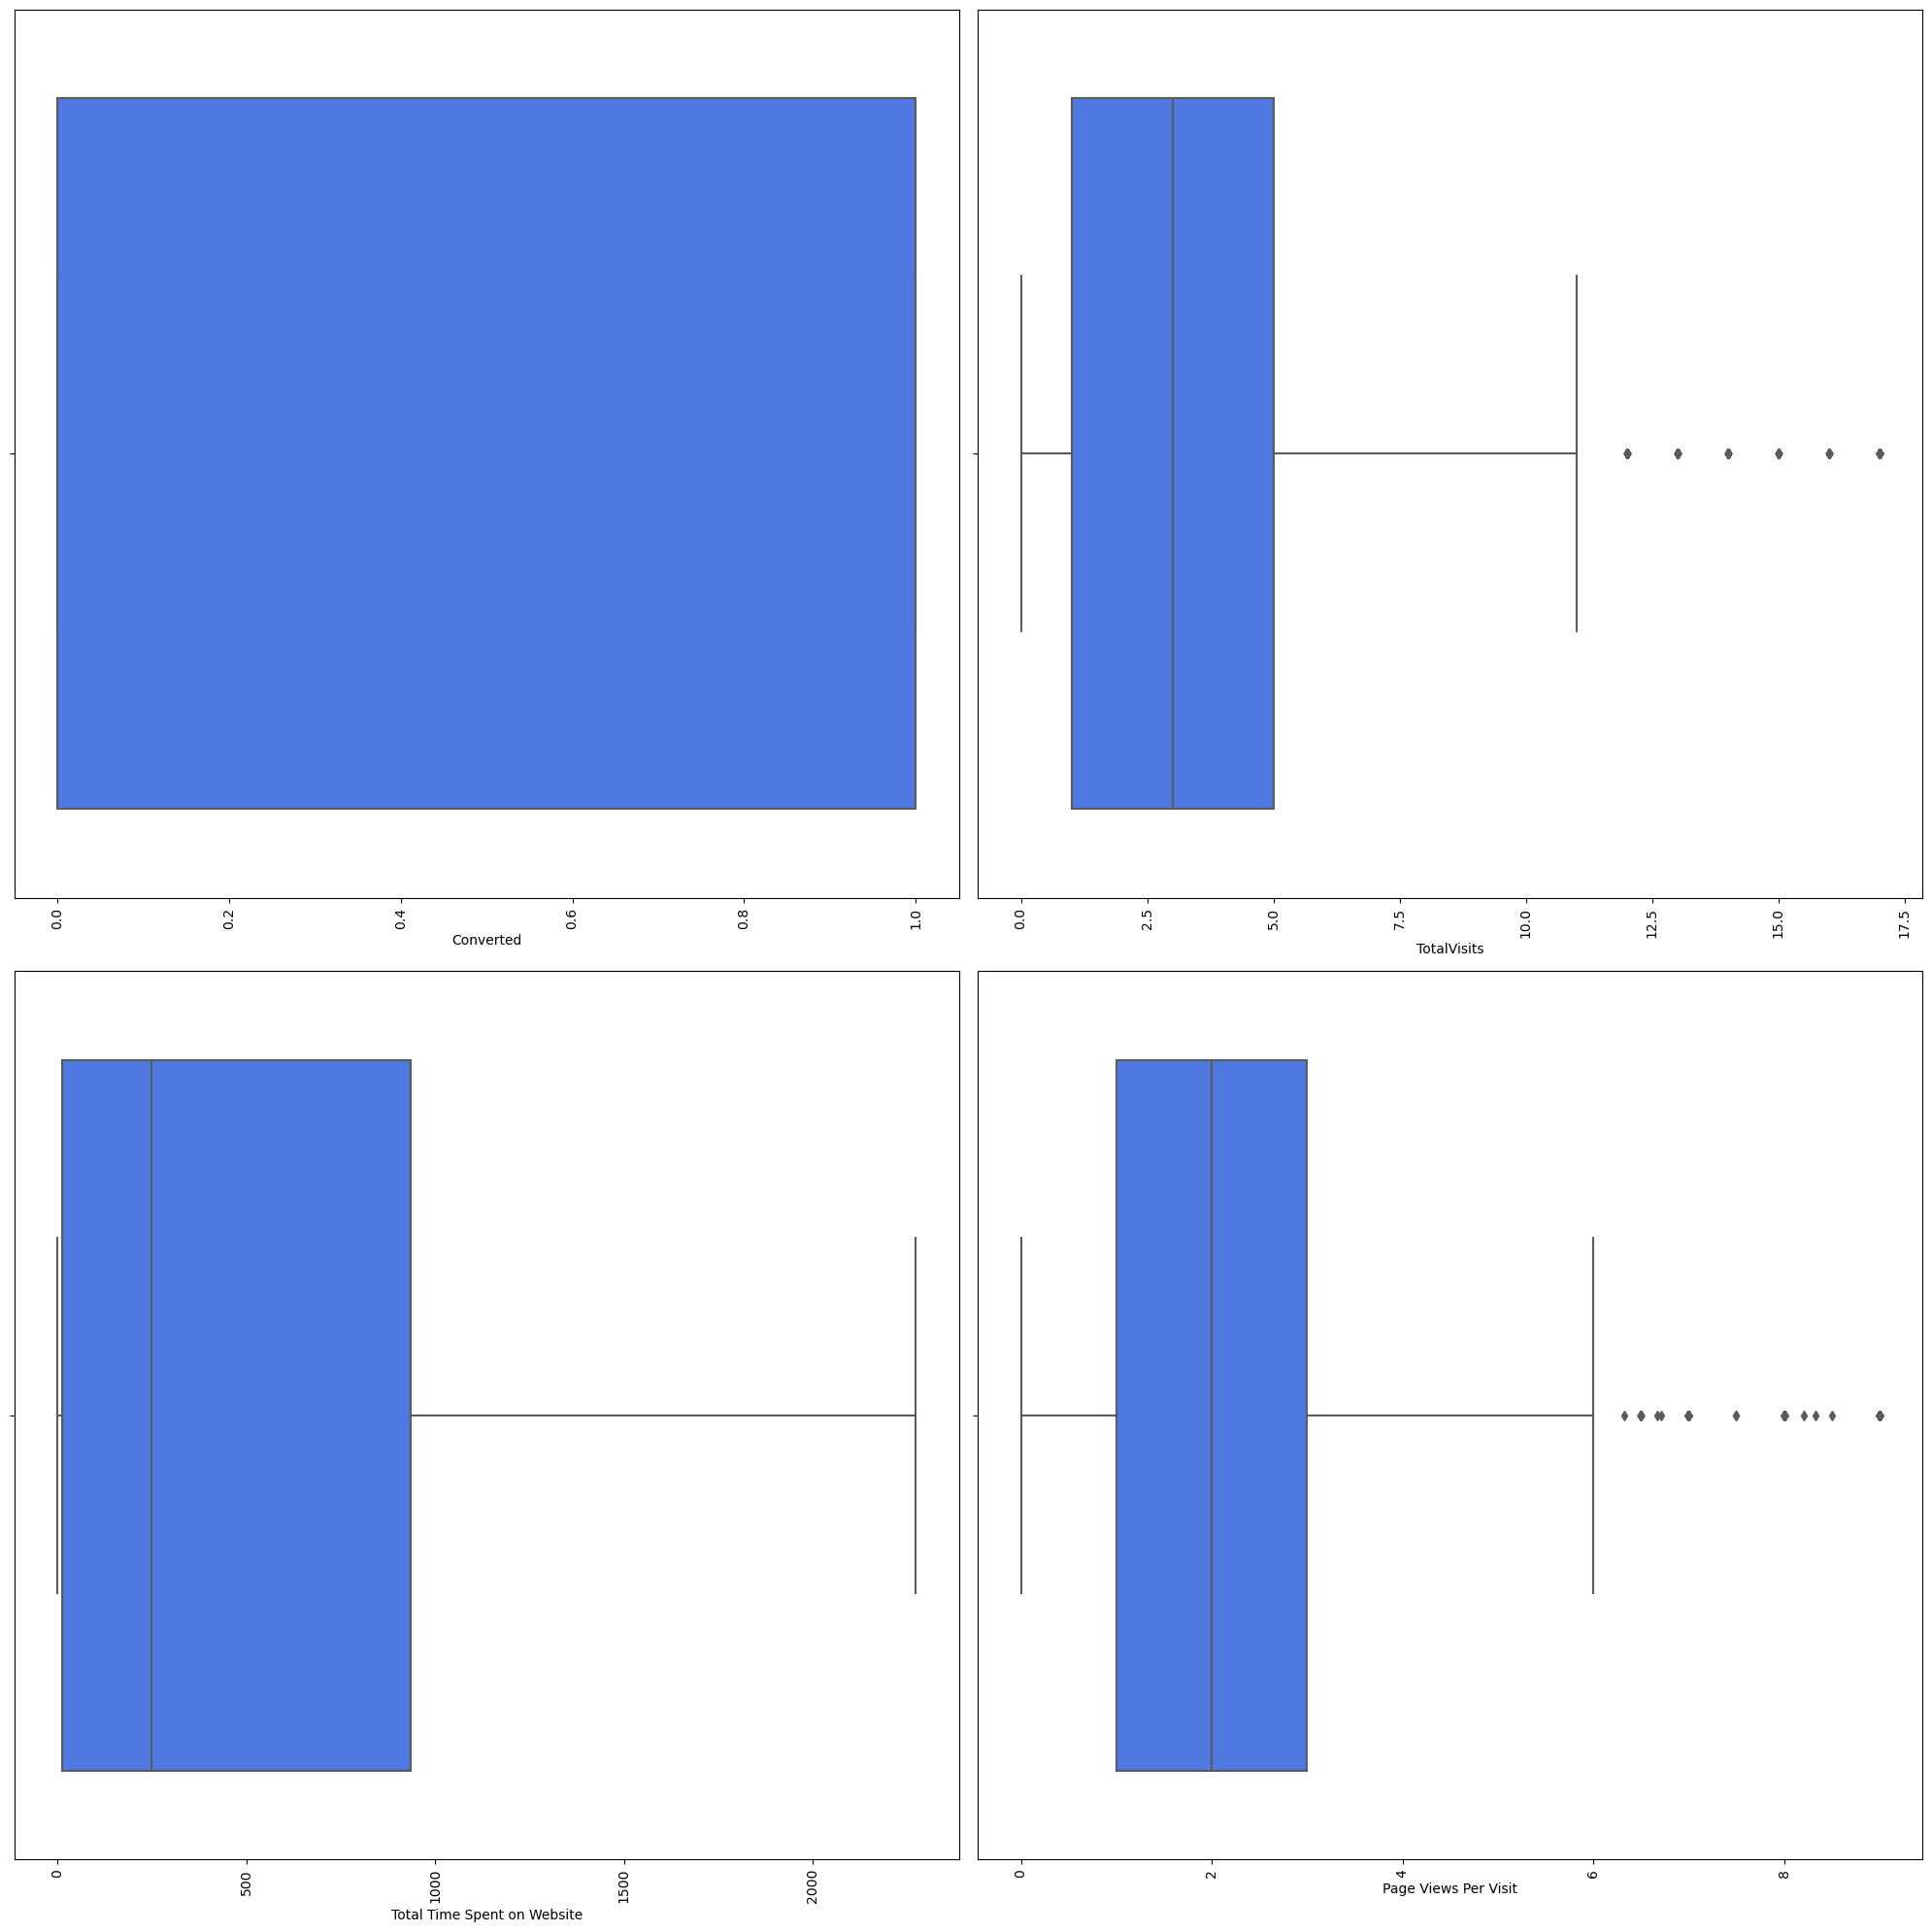

In [91]:
#Plotting the columns again to visualize after capping
numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (20, 20))
sns.set_palette('rainbow')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## Data Preparation

**Converting Binary Variables**
- Any kind of Data Preparation while performing Model Building involves converting Yes/No columns to binary values.

In [92]:
varlist =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [93]:
#Inspecting the data for the same.
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Mumbai,0,Modified


In [94]:
#Checking for all columns
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
#Rename the columns
lead.rename(columns={'Total Time Spent on Website' : 'Time Spent', 'What is your current occupation':'Current Occupation', 'A free copy of Mastering The Interview':'Free Copy'}, inplace=True )

In [96]:
#Check if it has correctly been renamed
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Time Spent', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'Current Occupation', 'City', 'Free Copy', 'Last Notable Activity'],
      dtype='object')

**Create Dummies for Categorical columns**

In [97]:
#Checking for categorical columns in the dataframe.
lead.dtypes

Prospect ID                            object
Lead Number                             int64
Lead Origin                            object
Lead Source                            object
Converted                               int64
TotalVisits                           float64
Time Spent                              int64
Page Views Per Visit                  float64
Last Activity                          object
Specialization                         object
How did you hear about X Education     object
Current Occupation                     object
City                                   object
Free Copy                               int64
Last Notable Activity                  object
dtype: object

In [98]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation']], drop_first=True)

In [99]:
#Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [100]:
#Checking if the dummy-variables are added into the dataframe correctly.
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,0,0,1,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,0,1,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,...,0,0,0,0,1,0,0,0,1,0


In [101]:
#Dropping the original columns
lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation'],axis=1,inplace=True)

In [102]:
#Inspecting the dataframe again
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Time Spent,Page Views Per Visit,How did you hear about X Education,City,Free Copy,Last Notable Activity,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,Select,Select,0,Modified,...,0,0,0,0,1,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,Select,Select,0,Email Opened,...,0,0,0,0,1,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,Select,Mumbai,1,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,Word Of Mouth,Mumbai,0,Modified,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,Other,Mumbai,0,Modified,...,0,0,0,0,1,0,0,0,1,0


**Checking the datatypes of all columns**

In [103]:
#Checking Datatypes
lead.dtypes

Prospect ID                                  object
Lead Number                                   int64
Converted                                     int64
TotalVisits                                 float64
Time Spent                                    int64
Page Views Per Visit                        float64
How did you hear about X Education           object
City                                         object
Free Copy                                     int64
Last Notable Activity                        object
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Others                            uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Organic Search                    uint8
Lead Source_Others                            uint8
Lead Source_Reference                         uint8
Last Activity_Email Bounced                   uint8
Last Activit

## Test-Train Data Split

In [104]:
#Importing the required libraries to divide the data into test data and training data.
from sklearn.model_selection import train_test_split

In [105]:
#Adding all feature columns to X Variable
X = lead.drop(['Converted','Prospect ID','Lead Number','Last Notable Activity'], axis=1)

In [106]:
X.head()

,TotalVisits,Time Spent,Page Views Per Visit,How did you hear about X Education,City,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5.0,674,2.5,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2.0,1532,2.0,Select,Mumbai,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,Word Of Mouth,Mumbai,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,Other,Mumbai,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [107]:
#Adding our target column to Y Variable
y = lead['Converted']

In [108]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Splitting the data into train and test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Scaling all the required variables**

In [110]:
#Checking the dataframe again
X.head()

,TotalVisits,Time Spent,Page Views Per Visit,How did you hear about X Education,City,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5.0,674,2.5,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2.0,1532,2.0,Select,Mumbai,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,Word Of Mouth,Mumbai,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,Other,Mumbai,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [111]:
#We can see that columns except TotalVisits, Time Spent and Page Views Per Visit all the other columns are present in the range of 0 - 1, so we need to scale these variables as well.
scaler = StandardScaler()
X_train[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time Spent','Page Views Per Visit']])
X_train.head()

,TotalVisits,Time Spent,Page Views Per Visit,How did you hear about X Education,City,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,Select,Select,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,Select,Other Cities,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8105,0.512365,1.365219,1.364995,Other,Mumbai,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,Select,Select,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [112]:
#Checking the mean and standard deviation
X_train.describe()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005257,0.320037,0.190167,0.121058,...,0.020563,0.157545,0.057205,0.055040,0.209957,0.037570,0.021336,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466527,0.392463,0.326219,...,0.141926,0.364342,0.232251,0.228076,0.407309,0.190168,0.144512,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation : Standard Deviation is set to 1 and hence it is scaled correctly.**

**Conversion Rate before modelling**

In [113]:
#Checking the Converted Rate before modelling
Converted_Rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted_Rate

38.53896103896104

**Observation : We can see that conversion rate before modelling is found to be around 38.53%**

## Model Building

**Model - I**

In [114]:
# Logistic regression model
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train)).astype(float), family = sm.families.Binomial())
logm1.fit()

ValueError: could not convert string to float: 'Select'

In [ ]:
print(logm1.fit().summary())

In [ ]:
#Total number of columns
print(len(X_train.columns))

**Observation : We currently have around 35 columns for our evaluation.**

**Model - II : Feature Selection using RFE**

In [ ]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:

from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Printing all the columns that are selected using RFE
rfe.support_

In [ ]:
#List of all columns on priority ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
#This list will hold all the data that is being selected through RFE.
col = X_train.columns[rfe.support_]

In [ ]:
col

In [ ]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

#### **Assessing the model that has already been generated through RFE using Statsmodel - Model 2**

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**Observations:-**

- **We see there are many variables with a high P-value and VIF value.**
- **We need to continue model building process to improve the model.**
- **Factors that are needed for consideration : VIF < 5% and P-Value < 5%**

**Inferences from the above  :-**
- **Lead Source_Others - has a P-value of 56.3%.**
- **The above model has 20 features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~18.**

**Model- III [Dropping Lead_Source Others]**

In [ ]:
col = col.drop('Lead Source_Others')
col

In [ ]:
print(len(col))

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**Inferences from the above model :-**

- **Lead Origin_Others - has a P-value of 40.0%.**
- **The above model has 19 features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~18.**

**For Model 4 - We need to remove Lead Origin_Others**

**Model - IV [Drop Lead Origin_Others]**

In [ ]:
col = col.drop('Lead Origin_Others')
col

In [ ]:
print(len(col))

In [ ]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

In [ ]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**Inferences from the above model :-**

- **Current Occupation_Student - has a P-value of 32.47%.**
- **The above model has 18features, and we need to reduce it further.**
- **Current Occupation_Unemployed has a VIF score of ~18.**

**For Model - 5, we need to remove Current Occupation_Student and then proceed further.**

**Model - V [Drop Current_Occupation_Student]**

In [ ]:
#Dropping "Current Occupation_Student" for further evaluation
col = col.drop('Current Occupation_Student')

In [ ]:
#Print all the features and the total number of features that we consider for further model building.
print(col)

In [ ]:
print(len(col))

In [ ]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Perform all the scaling on the available features.
X_test[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Time Spent','Page Views Per Visit']])

In [ ]:
#Selecting all the features, which are selected as per final model
#col has all the features available in the final model.

X_test = X_test[col]
X_test.head()

### Building the model - ON TEST SET

In [ ]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [ ]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [ ]:
#Displaying all the predicted values
y_test_pred[:10]

### **Creating a dataframe with the predicted values**

In [ ]:
#Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

In [ ]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
#Removing index for both dataframes to append them side by side
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
#Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [ ]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [ ]:
#Displaying the predicted value dataframe.
y_pred_final.head()

**Calculation of Model Evaluation parameters**

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

In [ ]:
TP = confusionTest[1,1] # true positive
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [ ]:
#Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100
print(sensitivity)

In [ ]:
#Let's calculate specificity
TN / float(TN+FP)

**ACCURACY - SPECIFICITY - SENSITIVITY**

- **ACCURACY - 80.23%**
- **SENSITIVITY - 79.0%**
- **SPECIFICITY - 80.91%**

## OBSERVATION :

**We got 0.5% to 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.**

**From our model, We can conclude following points :**
    
**1. The customer/leads who fills the form are the potential leads.**

**2. We must majorly focus on working professionals.**

**3. We must majorly focus on leads whose last activity is SMS sent or Email opened.**

**4. It’s always good to focus on customers, who have spent significant time on our website.**

**5. It’s better to focus least on customers to whom the sent mail is bounced back.**

**6. If the lead source is referral, he/she may not be the potential lead.**

**7. If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.**

## LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS

In [ ]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X[['TotalVisits','Time Spent','Page Views Per Visit']])

In [ ]:
#Selecting the features in our final model on the scaled dataframe.
X = X[col]
X.head()

In [ ]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [ ]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [ ]:
#Printing the probabilities
y_ans_pred[:10]

In [ ]:
#Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [ ]:
#Converting y to dataframe
y_df = pd.DataFrame(y)

In [ ]:
#Putting Lead_Number to index
y_df['Lead_Number'] = lead['Lead Number']

In [ ]:
#Removing index for both dataframes to append them side by side
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [ ]:
#Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [ ]:
#Renaming the column
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [ ]:
#Displaying the Answer_Dataframe
y_ans_final.head()

### **Finding the converted value using the probability cut-off = 0.35**

In [ ]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [ ]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [ ]:
#Displaying the predicted conversion on the final values
y_ans_final.head()

### **Metric Calculation - Complete Dataframe**

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

In [ ]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

In [ ]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100
print(sensitivity)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

## Sorting The Dataframe - To Find The Top Leads

In [ ]:
#Sorting values to find the top leads.
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)

In [ ]:
#Displaying the top leads
ResultDf.head()

In [ ]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 35]

In [ ]:
print(ResultDf.shape)
print(FilteredResult.shape)

In [ ]:
FilteredResult.head(10)

In [ ]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

**Observation - We provide a list of only 4000 who have the chances of getting converted into a potential lead so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 73%.**

### Sorting The Dataframe - To Find The Hot Leads With Higher Conversion Rate.

In [ ]:
HotLeads = ResultDf.loc[ResultDf['Score'] >= 95]

In [ ]:
HotLeads.shape

In [ ]:
#Checking the Converted Rate
Converted_Rate_ForHotLeads= (sum(HotLeads['Converted'])/len(HotLeads['Converted'].index))*100
Converted_Rate_ForHotLeads

**Here, we provide a list of only 700 who are mostly getting converted to a lead,  so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 96%. This list aims to target the top 10% of the customers.**

## CONCLUSION

- **Conversion Rate for hot leads is increases from 73% to 96%. This means they have a 96% probability of getting converted to a lead.**

- **Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.**

**From our model, we can conclude following points :**

- The customer/leads who fills the form are the potential leads.
- We must majorly focus on working professionals.
- We must majorly focus on leads whose last activity is SMS sent or Email opened.
- It’s always good to focus on customers, who have spent significant time on our website.
- It’s better to focus least on customers to whom the sent mail is bounced back.
- If the lead source is referral, he/she may not be the potential lead.
- If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.


**We know that the relationship between ln(odds) of ‘y’ and feature variable “X” is much more intuitive and easier to understand.**

**Equation:**

**ln(odds)= -1.0565 * const + 0.1944 * TotalVisits + 1.0574* Time Spent -0.3186 * Free
Copy -1.0199 * Lead Origin_Landing Page Submission + 4.4017 * Lead Origin_Lead Add
Form + 1.2101 * Lead Source_Olark Chat-1.1764 * Lead Source_Reference -1.1921 *
Last Activity_Email Bounced + 0.8166 * Last Activity_Email Opened -0.6859 * Last
Activity_Olark Chat Conversation + 0.6463 * Last Activity_Others - 1.9097 * Last
Activity_SMS Sent -1.1380 * Specialization_Not Specified + 2.6908 * Current
Occupation_Working Professional**



## RECOMMENDATIONS

- **It’s good to collect data often and run the model and get updated with the potential leads. There is a belief that the best time to call your potential leads is within few hours after the lead shows interest in the courses.**

- **Along with phone calls, it’s good to mail the leads also to keep them reminding as email is as powerful as cold calling.**

- **Reducing the number of call attempts to 2-4 and increasing the frequency of usage of other media like advertisements in Google, or via emails to keep in touch with the lead will save a lot of time.**

- **Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.**